In [1]:
import os
import argparse
import time
from contextlib import contextmanager
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
import torch
import torchvision
import sys
sys.path.append("../")
from methods_v2 import NMF_CONCEPTS
from data_preprocessing import get_train_dataset_cifar10, get_test_dataset_cifar10, get_train_dataset_cifar100, get_test_dataset_cifar100, get_train_dataset_ImageNet_1K, get_test_dataset_ImageNet_1K
from models import load_pretrained_weights_32


2024-07-08 12:32:40.150162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 12:32:41.218382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import json

def load_results(file_path):
    """
    Load results from a JSON file.

    Parameters:
    file_path (str): The path to the JSON file containing the results.

    Returns:
    list: A list of dictionaries containing the loaded results.
    """
    with open(file_path, 'r') as f:
        results = json.load(f)
    return results

# Example usage
file_path = "PCA_CONCEPTS_results_distances_cifar10.json"
loaded_results = load_results(file_path)
print(loaded_results)

[{'distance': 'euclidean', 'reconstruction_error': 18.972544372081757, 'mean_score': 4.466778131895233, 'std_score': 2.7370403189241665, 'min_score': 0.8980015452067984, 'max_score': 15.715626566419122, 'fitting_time': 7.452288627624512, 'avg_scoring_time_per_img': 50.16650127459176, 'scores_in': [3.3639786126346314, 2.644054884943668, 1.9704026965530463, 3.6258810723831076, 4.0258204594819285, 3.678645344288403, 3.2693053676402726, 2.089833987249334, 4.056277979253284, 1.588820330527571, 3.833860843771131, 11.463678465835693, 1.6062215467043885, 4.652055555410795, 2.091419565880771, 8.383645965262792, 5.146231542548288, 2.1947915444667045, 6.3653730919628195, 2.299490106872046, 5.033227201549264, 3.4218874905705468, 6.423339551076646, 3.596527242086349, 2.0641116067012275, 9.218078219222505, 3.1577772520304674, 1.8864824295723448, 11.897581029857815, 3.6884976408285377, 4.641937091575622, 2.7217427118339006, 1.7966974255569805, 1.7030971115099547, 4.84439613436367, 11.801250603149764,

In [5]:
def plot_results(results, variable=["euclidean", "cosine", "l1", "manhattan", "minkowski"]):
        """Plots the results of the PCA evaluations."""
    # Plot histogram for each n_components on separate figures
        for i, result in enumerate(results):
            plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
            sns.histplot(result['scores_in'], kde=True, color='skyblue')
            plt.axvline(result['mean_score'], color='r', linestyle='--', label=f"Mean: {result['mean_score']:.2f}")
            plt.axvline(result['mean_score'] + result['std_score'], color='g', linestyle='--', label=f"+1 Std: {result['mean_score'] + result['std_score']:.2f}")
            plt.axvline(result['mean_score'] - result['std_score'], color='g', linestyle='--', label=f"-1 Std: {result['mean_score'] - result['std_score']:.2f}")
            plt.axvline(result['min_score'], color='b', linestyle=':', label=f"Min: {result['min_score']:.2f}")
            plt.axvline(result['max_score'], color='b', linestyle=':', label=f"Max: {result['max_score']:.2f}")
            plt.title(f"Histogram of Scores for distance={result['distance']}")
            plt.xlabel('Scores')
            plt.ylabel('Frequency')
            plt.legend()
            plt.tight_layout()
            plt.show()

        # Plot combined boxplot for all components on a separate figure
        plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
        scores_df = pd.DataFrame({
            f"{result['distance']}": result['scores_in']
            for result in results
        })
        sns.boxplot(data=scores_df)
        plt.title('Combined Boxplot of Scores for All distance')
        plt.xlabel('distances')
        plt.ylabel('Scores')
        plt.tight_layout()
        plt.show()

        # plot the differences in mean, std scores for all n_components
        mean_scores = [result['mean_score'] for result in results]
        std_scores = [result['std_score'] for result in results]
        plt.figure(figsize=(10, 5))
        plt.plot(variable, mean_scores, label='Mean Scores', marker='o')
        plt.plot(variable, std_scores, label='Std Scores', marker='o')
        plt.title('Mean and Std Scores vs. distance')
        plt.xlabel('distance')
        plt.ylabel('Scores')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot fitting time and scoring time
        fitting_times = [result['fitting_time'] for result in results]
        scoring_times = [result['avg_scoring_time_per_img'] for result in results]
        plt.figure(figsize=(10, 5))
        plt.plot(variable, fitting_times, label='Fitting Time', marker='o')
        plt.title('Fitting Time vs. distances')
        plt.xlabel('distances')
        plt.ylabel('Time (s)')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(variable, scoring_times, label='Scoring Time', marker='o')
        plt.title('Scoring Time vs. distances')
        plt.xlabel('distances')
        plt.ylabel('Time (ms)')
        plt.tight_layout()
        plt.show()

        # Plot reconstruction error
        reconstruction_errors = [result['reconstruction_error'] for result in results]
        plt.figure(figsize=(10, 5))
        plt.plot(variable, reconstruction_errors, label='Reconstruction Error', marker='o')
        plt.title('Reconstruction Error vs. distances')
        plt.xlabel('distances')
        plt.ylabel('Error (%)')
        plt.tight_layout()
        plt.show()

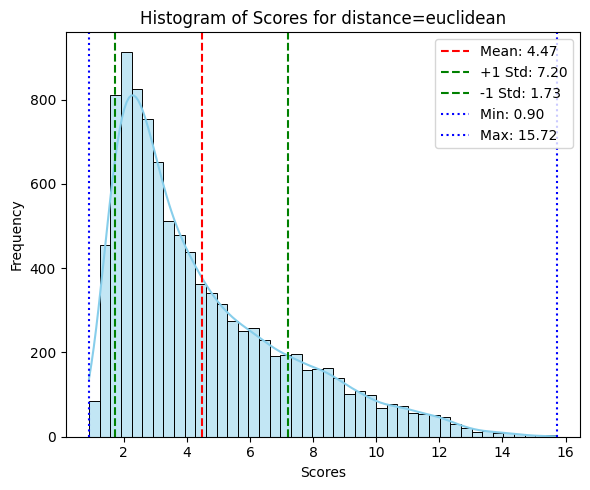

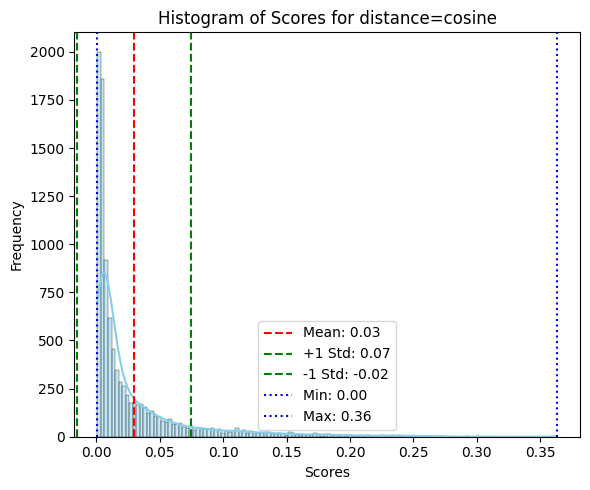

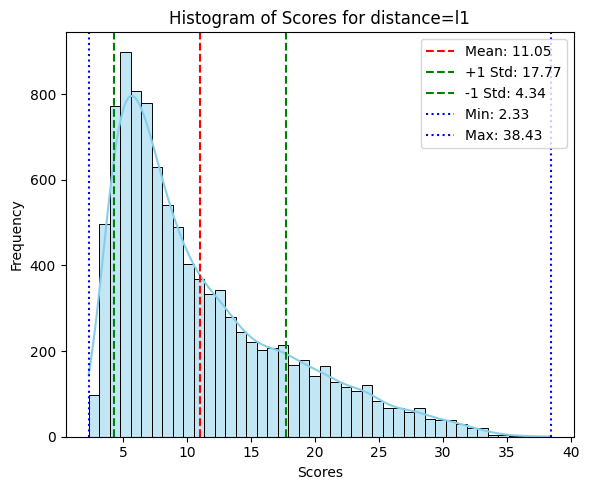

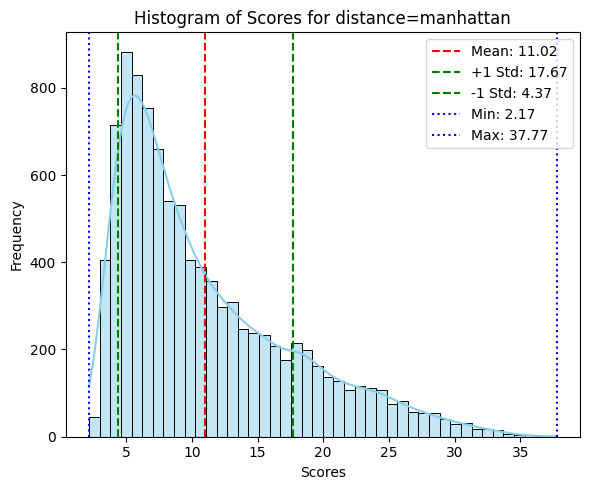

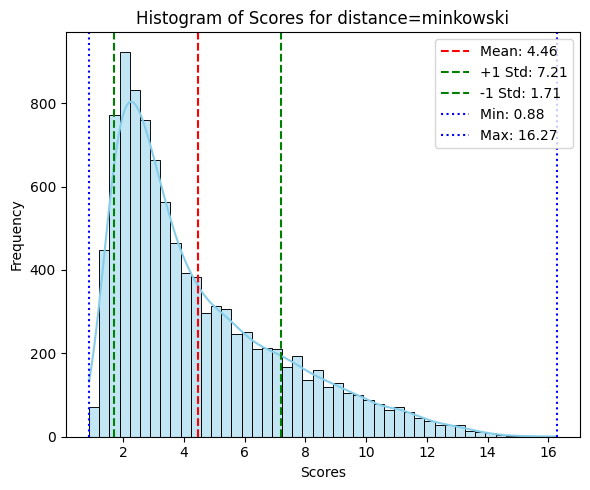

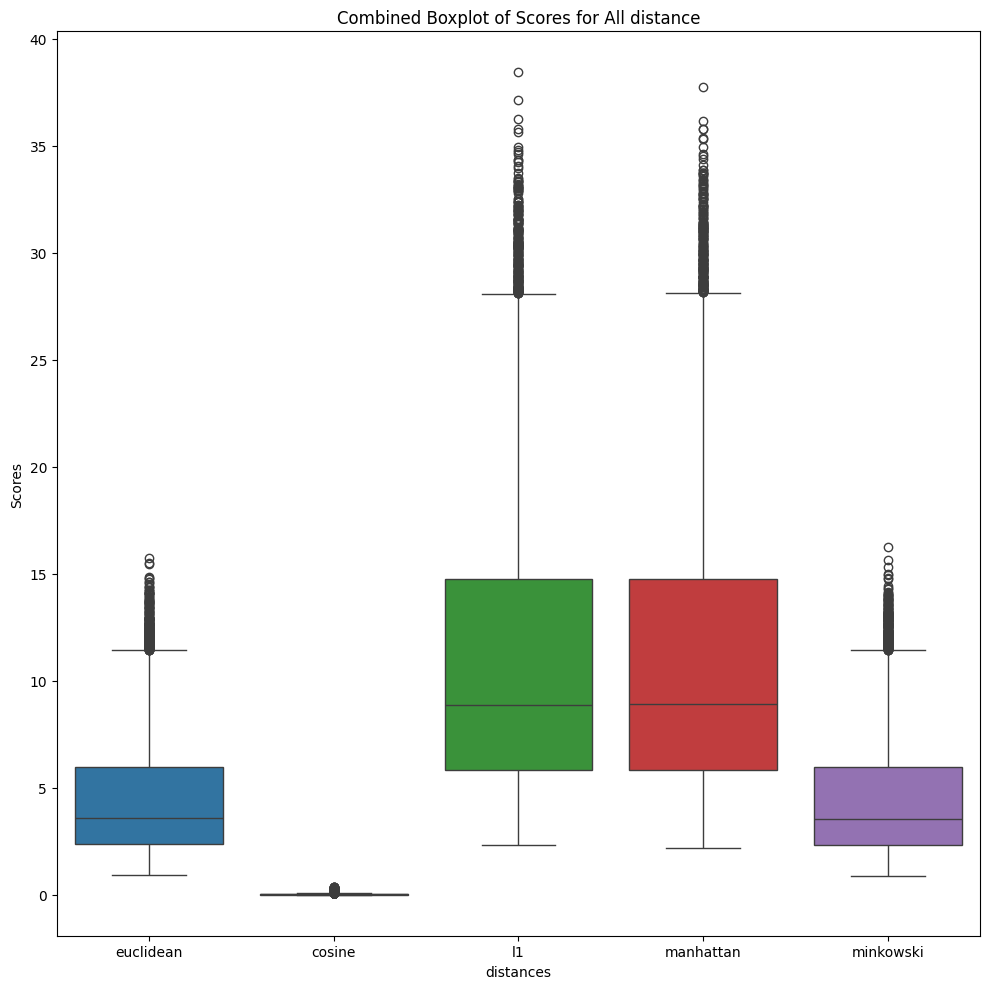

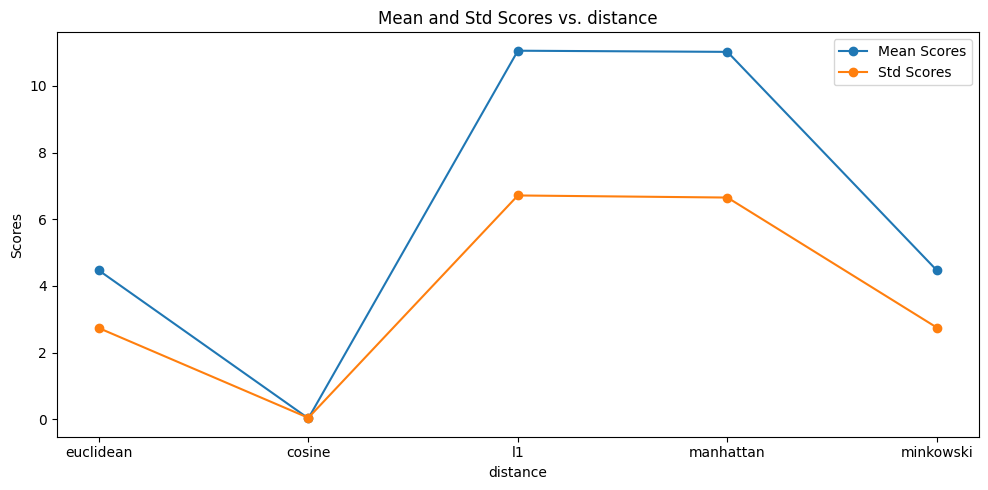

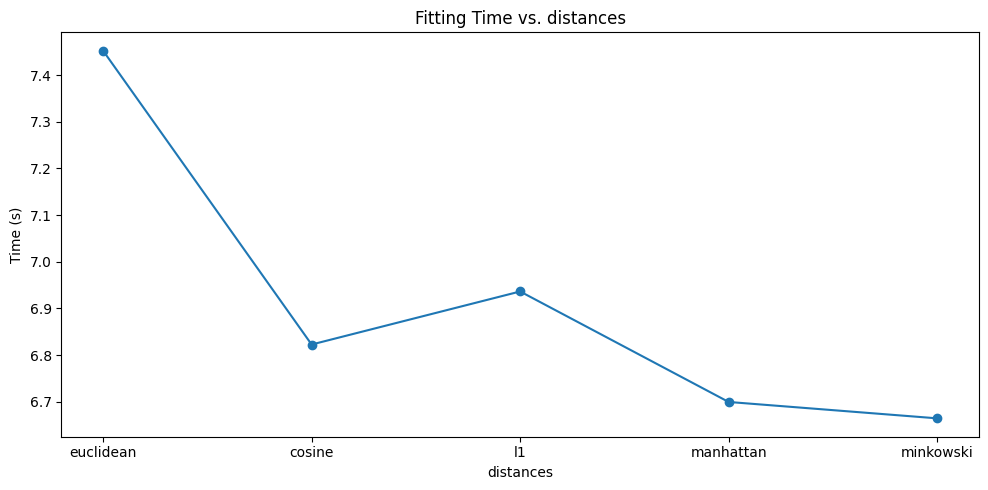

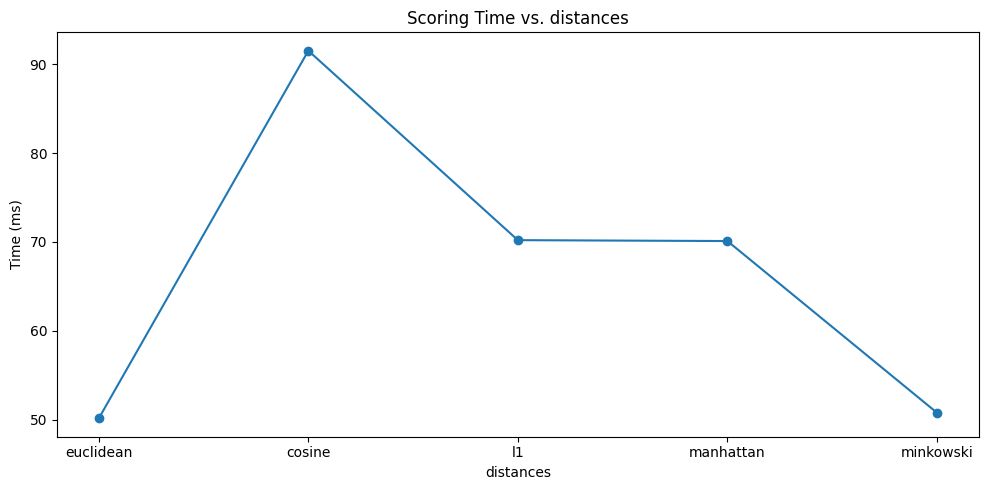

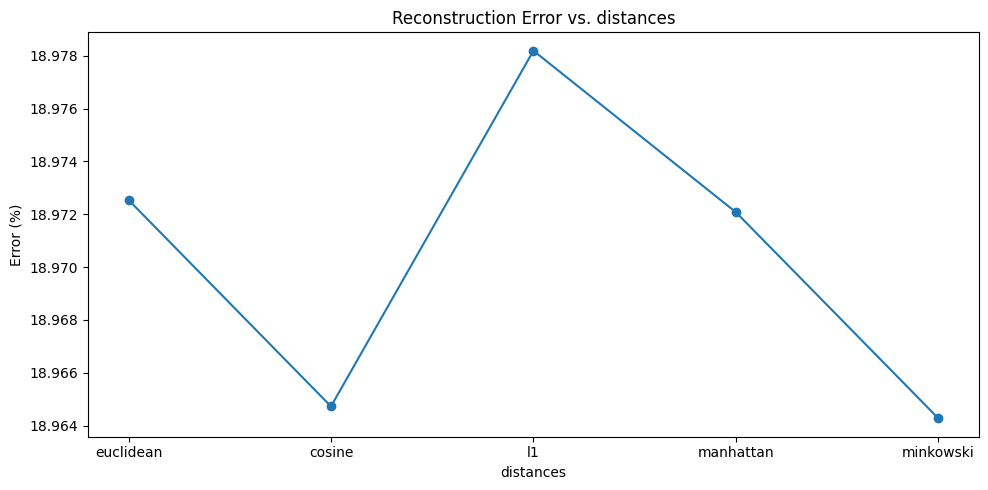

In [6]:
plot_results(loaded_results)